## BIOS512: Final Course Project

### An Exploration of Dengue Prevalence In the Philippines 
#### By: Aarushi Joshi

As a part of my MPH degree requirements, I took a class on Understanding Public Health Issues for which my group and I chose to do a literature review of a Water and Sanitation Health (WaSH) related public health issue. We chose to focus on Dengue and upon learning that Asia bears 70% of the burden on disease for dengue, we decided to narrow down out topic to Dengue in Indonesia (WHO, 2011).  As I was searching for datasets for this project, I found a complete dataset on Kaggle on Dengue in the Philippines. I chose to use this dataset for my project because I wanted to get a better picture of how dengue prevalence has affected the country. Furthermore, the geographic makeup of the Philippines as an island country is similar to that of Indonesia and exploring the trends of dengue over time and over different regions of the country may reveal geography-specific patterns. 

The 'denguecases' dataset contains four columns which report monthly recorded cases of dengue per 100,000 population for each of the defined regions in the Philippines from 2008 to 2016. There are a total of 1836 observations and no missing values.

In [3]:
#Import packages
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
#Import dataset: original dataset found on kaggle uploaded by user Francis Paul Flores
dengue = read.csv('https://raw.githubusercontent.com/aarushij/BIOS512-assignments/master/Project/denguecases.csv')

In [5]:
head(dengue, 10)

Month,Year,Region,Dengue_Cases
<fct>,<int>,<fct>,<dbl>
Jan,2008,Region.I,2.953926
Feb,2008,Region.I,2.183336
Mar,2008,Region.I,0.972410
Apr,2008,Region.I,9.357156
May,2008,Region.I,7.320599
Jun,2008,Region.I,4.513452
Jul,2008,Region.I,6.825220
Aug,2008,Region.I,9.210377
Sep,2008,Region.I,13.301839


In [81]:
dengue$Year = as.factor(dengue$Year)
dengue$Region = as.factor(dengue$Region)
dengue$Month = as.factor(dengue$Month)
summary(dengue)

     Month          Year           Region      Dengue_Cases    
 Apr    :153   2008   :204   ARMM     : 108   Min.   :  0.000  
 Aug    :153   2009   :204   CAR      : 108   1st Qu.:  2.947  
 Dec    :153   2010   :204   CARAGA   : 108   Median :  6.395  
 Feb    :153   2011   :204   NCR      : 108   Mean   : 11.297  
 Jan    :153   2012   :204   Region.I : 108   3rd Qu.: 13.438  
 Jul    :153   2013   :204   Region.II: 108   Max.   :147.324  
 (Other):918   (Other):612   (Other)  :1188                    

The number of dengue cases ranges from 2.947 per 100,000 people to 147.324 per 100,000 people, with an average of 11.296 cases per 100,000. There are no missing values in the dataset. 

#### Dengue Cases per Year

In [82]:
dengue_year = dengue %>% 
    group_by(Year) %>% 
        summarize(Total_cases = sum(Dengue_Cases)) %>% 
            print

# A tibble: 9 x 2
  Year  Total_cases
  <fct>       <dbl>
1 2008        1524.
2 2009        1317.
3 2010        1042.
4 2011        1225.
5 2012        3293.
6 2013        4919.
7 2014        3207.
8 2015        2354.
9 2016        1859.


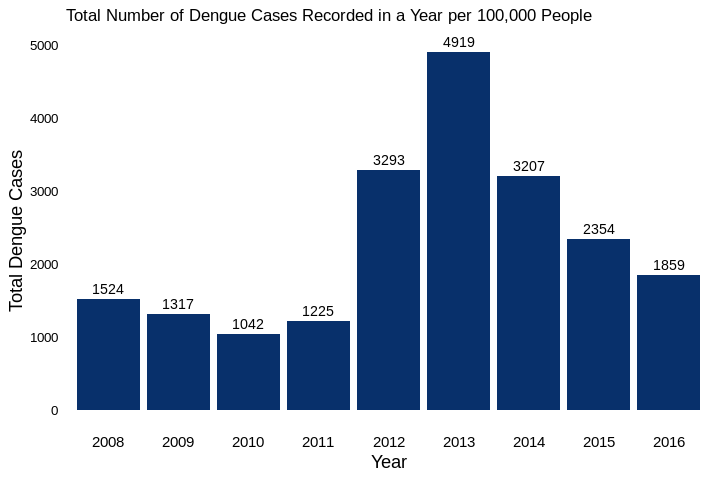

In [122]:
options(repr.plot.width=6, repr.plot.height=4)
p1 = ggplot(dengue_year, aes(Year, Total_cases))+geom_bar(stat="identity", fill='#08306b')

p1 = p1 + theme(axis.text.y=element_text( 
            color="black",size=8),axis.text.x=element_text(color="black",size=9),
              plot.title = element_text(size=10))
p1 = p1 + theme(panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              panel.border = element_blank(),
              panel.background = element_blank(),
              axis.ticks = element_blank())
p1 = p1 + labs(x="Year", 
             y="Total Dengue Cases",
             title='Total Number of Dengue Cases Recorded in a Year per 100,000 People')
p1 = p1 + geom_text(aes(label = round(Total_cases, digits = 0)), vjust=-0.5, size=3)
p1

The number of cases seems to have increased between 2010 to 2013, where it peaks at 4919 cases per 100,000. Following 2013, there is a steady decrease in total dengue cases each year. The total number of dengue cases in 2016 is less than half that of the number of cases in 2013. While it is useful to know that trends show a general decrease in annual dengue cases, more information can be gained from looking at monthly records of dengue. 

#### Average Monthly Dengue Cases

In [103]:
df.monthly = dengue %>% group_by(Month) %>%
summarize(Total_cases = mean(Dengue_Cases))
head(df.monthly)

Month,Total_cases
<fct>,<dbl>
Apr,6.801845
Aug,10.925423
Dec,16.171836
Feb,10.759284
Jan,6.761286
Jul,7.603685


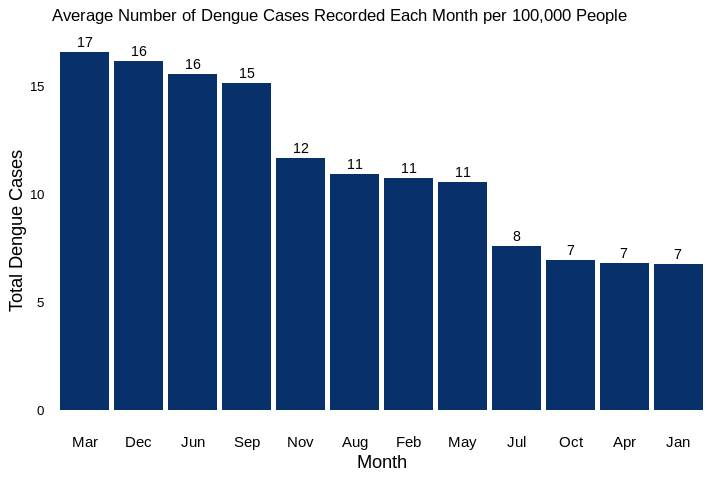

In [123]:
options(repr.plot.width=6, repr.plot.height=4)
m = ggplot(df.monthly, aes(x= reorder(Month, -Total_cases), y=Total_cases))+geom_bar(stat="identity", fill='#08306b')

m = m + theme(axis.text.y=element_text( 
            color="black",size=8),axis.text.x=element_text(color="black",size=9),
              plot.title = element_text(size=10))
m = m + theme(panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              panel.border = element_blank(),
              panel.background = element_blank(),
              axis.ticks = element_blank())
m = m + labs(x="Month", 
             y="Total Dengue Cases",
             title='Average Number of Dengue Cases Recorded Each Month per 100,000 People')
m = m + geom_text(aes(label = round(Total_cases, digits = 0)), vjust=-0.5, size=3)
m

On average, the months of March, December, June and September seem to have a higher prevalence of dengue cases. November, August, February and May have similar average number of cases and July, October, April and January have a similar number of reported cases. This graph shows a seasonal trend of dengue prevalence with different 'groups' of months having varying degrees of dengue cases.
The next step is to explore if this trend in time of year holds for different geographic regions within the Philippines.

### Dengue Cases by Region

In [102]:
dengue_region = dengue %>% 
    group_by(Region) %>% 
        summarize(Total_cases = sum(Dengue_Cases)) %>% 
            arrange(desc(Total_cases)) 

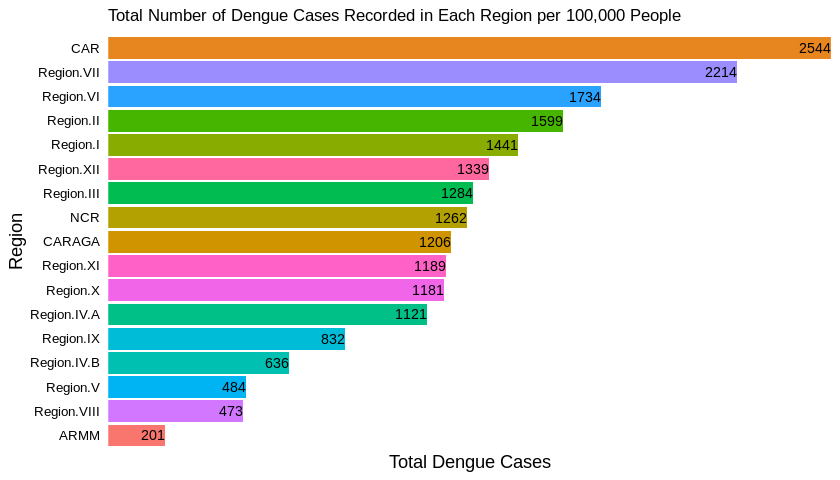

In [131]:
options(repr.plot.width=7, repr.plot.height=4)
p2 = ggplot(dengue_region, aes(x= reorder(Region, Total_cases),y=Total_cases))+geom_bar(stat="identity", aes(fill=Region))
p2 = p2 + coord_flip()
p2 = p2 + theme(axis.text.y=element_text( 
            color="black",size=8),axis.text.x=element_blank(),
                legend.position="none",
                  plot.title = element_text(size=10))
p2 = p2 + theme(panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              panel.border = element_blank(),
              panel.background = element_blank(),
              axis.ticks = element_blank())
p2 = p2 + labs(x="Region", 
             y="Total Dengue Cases",
             title='Total Number of Dengue Cases Recorded in Each Region per 100,000 People') +
scale_y_discrete(expand = c(0,0))
p2 = p2 + geom_text(aes(label = round(Total_cases, digits = 0)), hjust=1, size=3)

p2

The CAR region has the highest number of reported dengue cases between 2008 to 2016, with 2544 cases per 100,000 people. The ARMM region has the smallest number of reported dengue cases between 2008 to 2016, with 201 cases per 100,000 people. 

In [132]:
dengue2<-aggregate(Dengue_Cases~Month+Region,dengue,sum)

dengue2$Month<-factor(dengue2$Month,levels = c(
    "Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"))

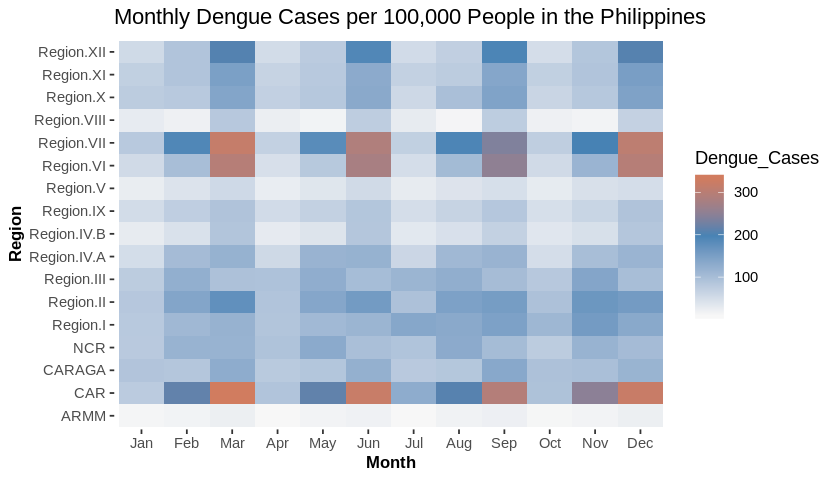

In [144]:
q = ggplot(dengue2,aes(x=Month,y=Region,fill=Dengue_Cases))+geom_tile()+
    scale_fill_gradient2(low = "#f7f7f7",mid = "steelblue",high = "#F57636",midpoint = 200)+
    xlab(label="Month")+ylab(label="Region")+
    ggtitle("Monthly Dengue Cases per 100,000 People in the Philippines")+
    theme(
        axis.title.x = element_text(size=10, face="bold"),
        axis.title.y = element_text(size=10, face="bold"))
q = q + theme(panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              panel.border = element_blank(),
              panel.background = element_blank())
q

Similar to the findings from the monthly graph which indicates a time-of-year pattern, the months of March, June, September and December show a general increase in dengue cases. This indicates a potential three-month cycle for dengue. This is consistent with the findings from other studies conducted in the Southeast Asia region. Mathematical modelling used to investigate dengue hemorrhagic fever outbreak in Bangkok, Thailand determined that the virus spread from Bangkok and other urban areas out to the Southeast Asian region at the speed of 148 kilometers per month, and occurred in yearly cycles three times, with each cycle having a different predominant serotype of the dengue virus (Cummings et al., 2004). 
The CAR region in this graph has higher reported dengue cases for almost all months as compared to other regions. Region.VII, similarly has generally higher cases of dengue and these results are consistent with the previous bar graph. The ARMM region has the lowest reported dengue cases throughout the year, followed by Region.VIII. Both ARMM and Region.VIII also show slight increases in dengue cases during the months of March, Hune, September and December.  

#### References
Cummings, D. A. T., Irizarry, R. A., Huang, N. E., Endy, T. P., Nisalak, A., Ungchusak, K., & Burke, D. S. (2004). Travelling waves in the occurrence of dengue haemorrhagic fever in Thailand. Nature, 427(6972), 344–347. https://doi.org/10.1038/nature02225

World Health Organization Regional Office for South-East Asia. (2011). Comprehensive Guidelines for Prevention and Control of Dengue and Dengue Haemorrhagic Fever (Revised an; WHO, ed.). New Delhi.

Data: https://www.kaggle.com/grosvenpaul/dengue-cases-in-the-philippines